In [1]:
!pip install gensim==4.3.2

# 의존성 연결을 위해 다운그레이드를 진행합니다.
!pip install scipy==1.12.0 numpy==1.26.2

# Step 1. 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기

In [6]:
import os

data_dir = os.path.join(os.getenv("HOME"), "work/weat/data")
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [7]:
from konlpy.tag import Okt

okt = Okt()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

print("슝~")

슝~


In [8]:
print(len(tokenized))

71156


# Step 2. 추출된 결과로 embedding model 만들기

In [9]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다.
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
# model.most_similar(positive=['영화'])

[('작품', 0.8836379647254944),
 ('다큐멘터리', 0.8507499694824219),
 ('드라마', 0.8185138702392578),
 ('에마데딘', 0.8088107705116272),
 ('영화로', 0.8009150624275208),
 ('코미디', 0.7913956046104431),
 ('형식', 0.7894256114959717),
 ('주제', 0.78628009557724),
 ('감동', 0.7690208554267883),
 ('편의', 0.7640326023101807)]

In [10]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.6986163258552551),
 ('연애', 0.6973814964294434),
 ('목말', 0.6916773915290833),
 ('진심', 0.6909404397010803),
 ('애정', 0.688186526298523),
 ('만남', 0.6769837141036987),
 ('첫사랑', 0.6724501848220825),
 ('가슴', 0.6682933568954468),
 ('이별', 0.6621271967887878),
 ('열정', 0.6621190905570984)]

In [11]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.8792727589607239),
 ('시나리오', 0.8695703148841858),
 ('배우', 0.8693483471870422),
 ('대본', 0.8682371973991394),
 ('오페라', 0.8653615117073059),
 ('영감', 0.8652237057685852),
 ('연기자', 0.8588903546333313),
 ('캐스팅', 0.8541169762611389),
 ('연기', 0.8540946841239929),
 ('공연', 0.851786196231842)]

# Step 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

KOBIS에서 제공한 정보를 기준으로 분류  
  
* 영화 구분  
synopsis_art.txt : 예술영화  
synopsis_gen.txt : 일반영화(상업영화)  
그 외는 독립영화 등으로 분류됩니다.  
  
* 장르 구분   
synopsis_SF.txt: SF  
synopsis_가족.txt: 가족  
synopsis_공연.txt: 공연  
synopsis_공포(호러).txt: 공포(호러)  
synopsis_기타.txt: 기타  
synopsis_다큐멘터리.txt: 다큐멘터리  
synopsis_드라마.txt: 드라마  
synopsis_멜로로맨스.txt: 멜로로맨스  
synopsis_뮤지컬.txt: 뮤지컬  
synopsis_미스터리.txt: 미스터리  
synopsis_범죄.txt: 범죄  
synopsis_사극.txt: 사극  
synopsis_서부극(웨스턴).txt: 서부극(웨스턴)  
synopsis_성인물(에로).txt: 성인물(에로)  
synopsis_스릴러.txt: 스릴러  
synopsis_애니메이션.txt: 애니메이션  
synopsis_액션.txt: 액션  
synopsis_어드벤처.txt: 어드벤처  
synopsis_전쟁.txt: 전쟁  
synopsis_코미디.txt: 코미디  
synopsis_판타지.txt: 판타지  
  

In [12]:
# 텍스트 파일 명사 추출 함수
import os  # 운영체제 기능 사용을 위한 라이브러리 (코드 조각에서는 미사용)
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF 벡터화를 위한 라이브러리 (코드 조각에서는 미사용)
import numpy as np  # 수치 연산을 위한 라이브러리 (코드 조각에서는 미사용)
from konlpy.tag import Okt  # 한국어 형태소 분석을 위한 Okt 클래스

art_txt = 'synopsis_art.txt'  # 예술 영화 시놉시스 파일명을 변수에 저장
gen_txt = 'synopsis_gen.txt'  # 일반 영화 시놉시스 파일명을 변수에 저장

def read_token(file_name):  # 파일명을 입력받아 명사를 추출하는 함수 정의
    okt = Okt()  # Okt 형태소 분석기 객체 생성
    result = []  # 추출된 명사를 저장할 빈 리스트 생성
    with open(data_dir + '/' + file_name, 'r') as fread:  # 파일을 읽기 모드('r')로 열기
        print(file_name, '파일을 읽고 있습니다.')  # 현재 처리 중인 파일명 출력
        while True:  # 파일의 모든 줄을 읽기 위한 반복문
            line = fread.readline()  # 파일에서 한 줄씩 읽어옴
            if not line: break  # 더 이상 읽을 줄이 없으면 반복문 종료
            tokenlist = okt.pos(line, stem=True, norm=True)  # 읽어온 줄을 형태소 단위로 분석
            for word in tokenlist:  # 분석된 형태소 리스트를 순회
                if word[1] in ["Noun"]:  # 만약 형태소의 품사(word[1])가 'Noun'(명사)이면
                    result.append((word[0]))  # 해당 단어(word[0])를 result 리스트에 추가
    return ' '.join(result)  # result 리스트에 저장된 모든 명사를 공백으로 연결하여 하나의 문자열로 반환

print("슝~")  # 코드 실행 준비 완료를 알리는 출력

슝~


In [13]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.


In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [15]:
# Vectorizer 확인: 단어-인덱스 조회
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

23976
영화


In [16]:
# 두개념을 대표하는 단어 추출
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

* 결과 분석  
두개념 중에 중복된 단어가 많다. 상위 100개 단어들 중에 중복을 제외하고 상위 15개 단어를 확인

In [17]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [18]:
print(target_art)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']


In [19]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


장르별 단어 추출  
 드라마 장르와 액션 장르 비교  
 코퍼스는 장르 5개를 고려  

In [ ]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

print("슝~")

슝~


In [ ]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [ ]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 병사, 연합군, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


# Step 4. embedding model과 단어 셋으로 WEAT score 구해보기

In [ ]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [28]:
from numpy import dot
from numpy.linalg import norm

# 1. 코사인 유사도 계산 함수
def cosine_similarity(x, y):
    return dot(x, y) / (norm(x) * norm(y))

# 2. 단어 하나(w)의 연관성 점수를 계산하는 함수 (이름 변경!)
def s_word(w, A, B):
    c_a = [cosine_similarity(w, a) for a in A]
    c_b = [cosine_similarity(w, b) for b in B]
    return np.mean(c_a) - np.mean(c_b)

# 3. 단어 리스트(W)에 대해 각 단어의 연관성 점수를 계산하는 함수
def s(W, A, B):
    # 이름이 변경된 s_word 함수를 호출하도록 수정!
    return [s_word(w, A, B) for w in W]

# 이제 weat_score 함수는 의도대로 정상 작동합니다.
def weat_score(X, Y, A, B):
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    return (mean_X - mean_Y) / std_dev

# X, Y, A, B 변수가 올바르게 정의되어 있다고 가정하고 실행
# print(round(weat_score(X, Y, A, B), 3))

In [26]:
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

NameError: name 's' is not defined

In [29]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [30]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.72146505
드라마 액션 0.15222423
드라마 코미디 0.010299199
드라마 전쟁 0.5281585
드라마 공포(호러) 0.01642828
멜로로맨스 액션 0.6291354
멜로로맨스 코미디 0.7557935
멜로로맨스 전쟁 0.7235527
멜로로맨스 공포(호러) 0.61438453
액션 코미디 -0.20456083
액션 전쟁 0.61956537
액션 공포(호러) -0.24698274
코미디 전쟁 0.5838682
코미디 공포(호러) 0.018289626
전쟁 공포(호러) -0.5683511


In [31]:
# !apt-get update -qq
# !apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

<Axes: >

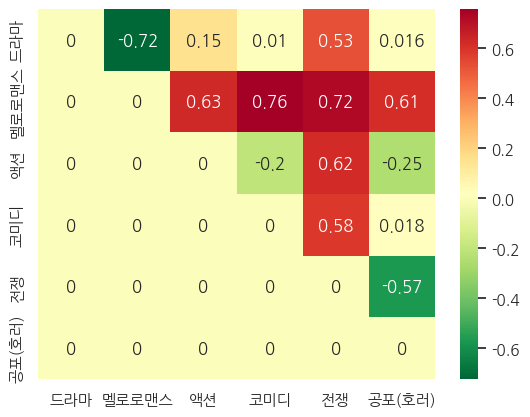

In [32]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax